In [53]:
import os
import json
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

In [54]:
# 1. 디렉토리 설정
source_root = r"C:\Users\USER\Desktop\47.물류공간 예측 데이터\3.개방데이터\1.데이터\Validation\01.원천데이터"
label_root  = r"C:\Users\USER\Desktop\47.물류공간 예측 데이터\3.개방데이터\1.데이터\Validation\02.라벨링데이터"

In [55]:
# 2. 이미지 인덱싱
img_map = {}
for dirpath, _, filenames in os.walk(source_root):
    for fname in filenames:
        if fname.endswith('.jpg'):
            img_map[fname] = os.path.join(dirpath, fname)

In [56]:
# 3. JSON과 이미지 매칭
pairs = []
for dirpath, _, filenames in os.walk(label_root):
    for fname in filenames:
        if fname.endswith('.json'):
            json_path = os.path.join(dirpath, fname)
            try:
                with open(json_path, 'r', encoding='utf-8') as f:
                    data = json.load(f)
                file_name = data['images'][0]['file_name']
                if file_name in img_map:
                    pairs.append((img_map[file_name], json_path))
            except Exception as e:
                continue

print(f"✅ 총 매칭된 이미지-라벨 수: {len(pairs)}개")

✅ 총 매칭된 이미지-라벨 수: 6049개


In [62]:
# 4. 하나를 선택하여 시각화 및 면적 측정
index = 3  # 원하는 인덱스로 변경 가능
img_path, json_path = pairs[index]

In [63]:
# 이미지 로드 (PIL로 한글 경로 대응)
try:
    pil_img = Image.open(img_path).convert("RGB")
    image_rgb = np.array(pil_img)
except Exception as e:
    print(f"[❌] 이미지 로드 실패: {img_path}")
    raise e

Text(0.5, 1.0, '01010101_8801052121161_2_1.jpg')

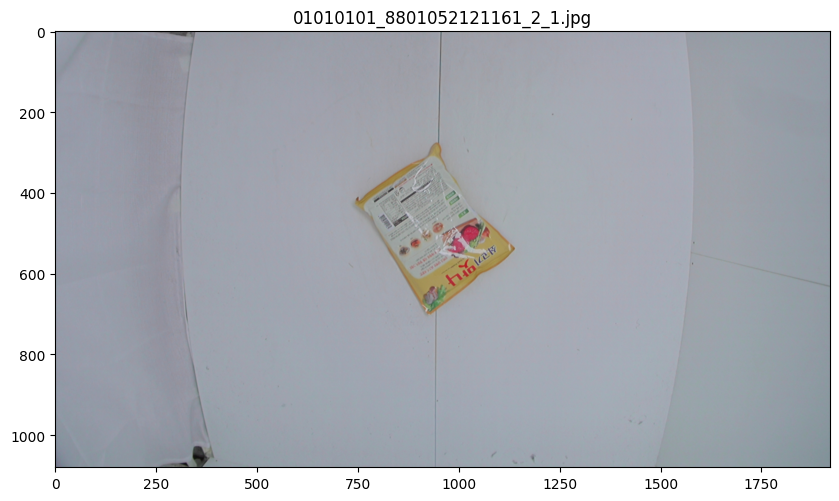

In [64]:
# JSON 로드
with open(json_path, 'r', encoding='utf-8') as f:
    data = json.load(f)

plt.figure(figsize=(10, 6))
plt.imshow(image_rgb)
plt.title(data['images'][0]['file_name'])

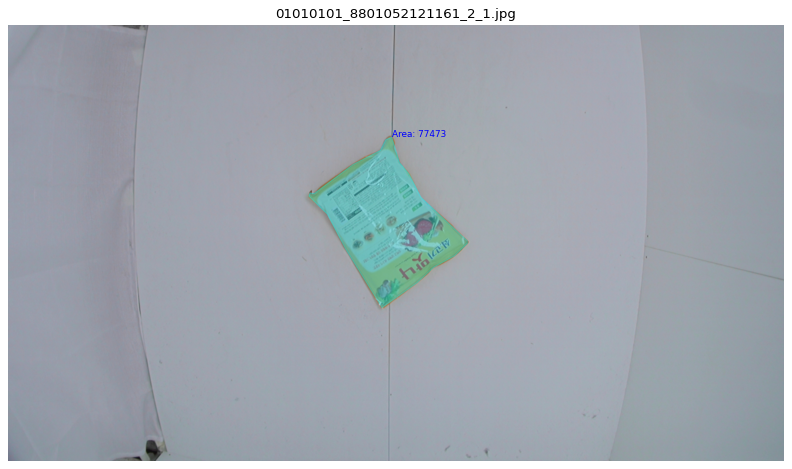

In [65]:
# 이미지 로드
image = Image.open(img_path).convert('RGB')  # PIL 방식 사용
plt.figure(figsize=(10, 6), dpi=80)           # figsize 줄이고, DPI 낮춤
plt.imshow(image)
plt.title(data['images'][0]['file_name'])

# Segmentation 표시 및 면적 계산 (최대 5개만 표시)
for i, ann in enumerate(data['annotations']):
    if i >= 5: break  # 너무 많으면 중단 (메모리 방지)
    
    seg = np.array(ann['segmentation'][0], dtype=np.int32).reshape(-1, 2)
    area = cv2.contourArea(seg.astype(np.float32))  # 면적 계산

    # 폴리곤 시각화
    poly = Polygon(seg, edgecolor='cyan', facecolor='cyan', alpha=0.3)
    plt.gca().add_patch(poly)

    # 폴리곤 안에 면적 표시
    x, y = seg[0]
    plt.text(x, y, f"Area: {int(area)}", color='blue', fontsize=8)

plt.axis('off')
plt.tight_layout()
plt.show()


🖼️ 이미지 1: 01010101_8801052121161_1_1.jpg


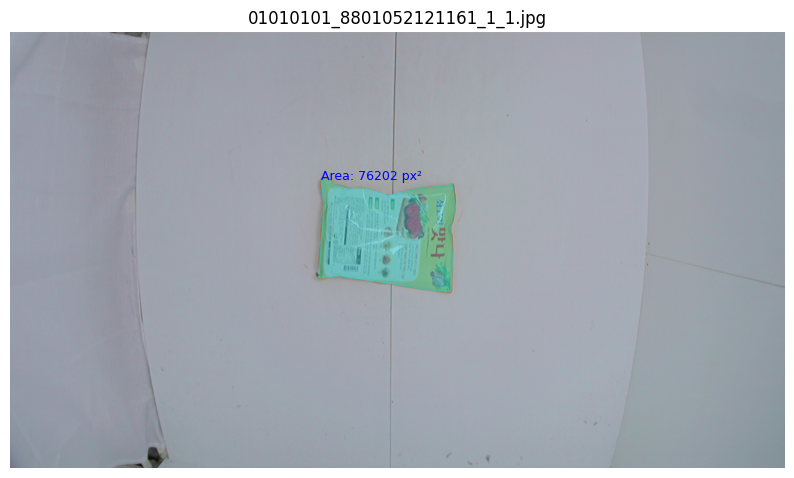


🖼️ 이미지 2: 01010101_8801052121161_1_2.jpg


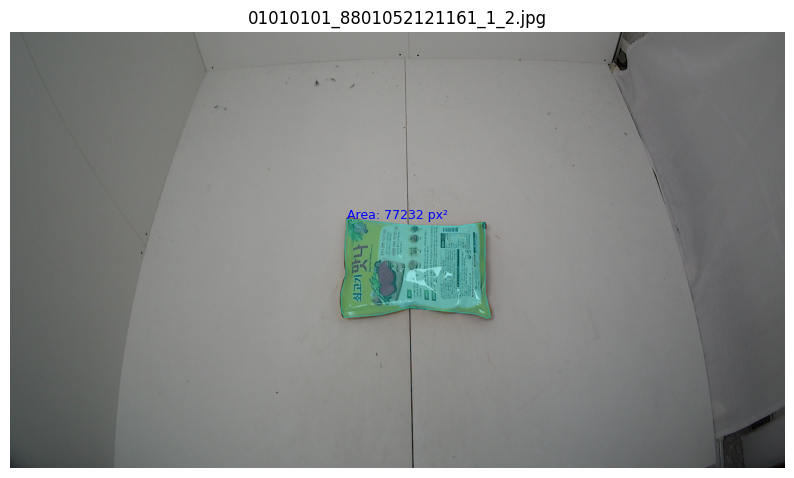


🖼️ 이미지 3: 01010101_8801052121161_1_3.jpg


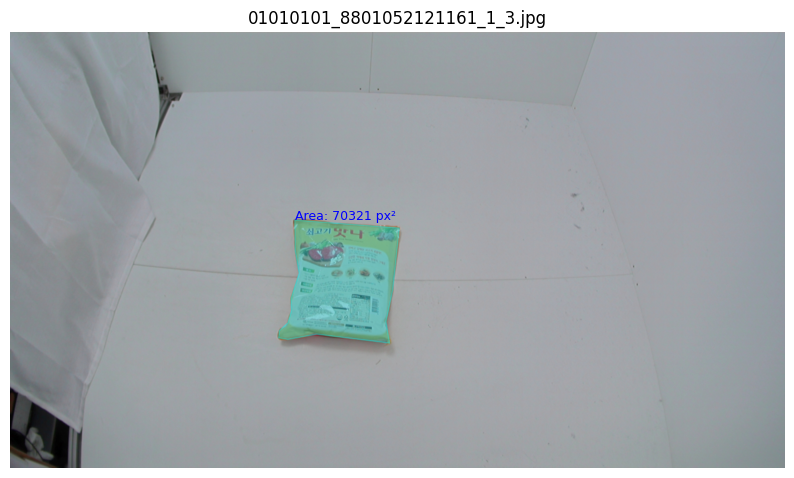


🖼️ 이미지 4: 01010101_8801052121161_2_1.jpg


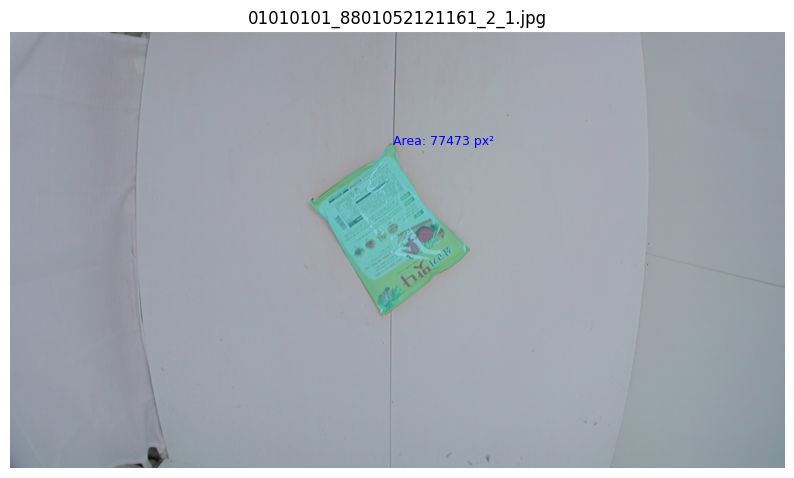


🖼️ 이미지 5: 01010101_8801052121161_2_2.jpg


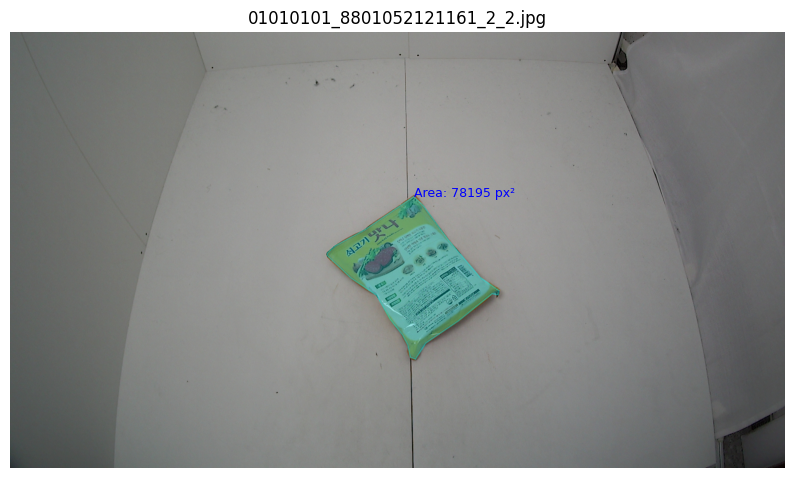

In [61]:
import os
import json
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import cv2  # 면적 계산용

# pairs 리스트에 (img_path, json_path) 쌍이 존재해야 함
# 예: pairs = [(img1, json1), (img2, json2), ...]

def visualize_segmentation_and_area(img_path, json_path):
    # 이미지 로드
    try:
        image = Image.open(img_path).convert("RGB")
    except:
        print(f"[❌] 이미지 로드 실패: {img_path}")
        return

    # 라벨 로드
    try:
        with open(json_path, 'r', encoding='utf-8') as f:
            data = json.load(f)
    except:
        print(f"[❌] JSON 로드 실패: {json_path}")
        return

    plt.figure(figsize=(10, 6))
    plt.imshow(image)
    plt.title(data['images'][0]['file_name'])

    # 세그멘테이션 및 면적 표시
    for ann in data['annotations']:
        seg = np.array(ann['segmentation'][0]).reshape(-1, 2)
        area = cv2.contourArea(seg.astype(np.float32))
        poly = Polygon(seg, edgecolor='cyan', facecolor='cyan', alpha=0.3)
        plt.gca().add_patch(poly)
        x, y = seg[0]
        plt.text(x, y, f"Area: {int(area)} px²", color='blue', fontsize=9)

    plt.axis('off')
    plt.show()

# ✅ 예시: 첫 5장만 확인
for i, (img_path, json_path) in enumerate(pairs[:5]):
    print(f"\n🖼️ 이미지 {i+1}: {os.path.basename(img_path)}")
    visualize_segmentation_and_area(img_path, json_path)